## 2019/2020 EE514 Data Analysis and Machine Learning Assignment

In [ ]:
# 2019/2020 EE514 Data Analysis and Machine Learning Assignment

# Author: Derek Aherne
# Student Number: 19215728
# Date: 2019-12-13
# Description: fake news data set analysis and modelling 

### Setup

In [3]:
#setup
from textblob import Word
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import json
import tldextract 
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib as mpl
nltk.download("stopwords")
nltk.download('wordnet')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Derek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read in the data

In [ ]:
#read in th raw data
data = []
with open('fake_news.json') as f:
    for line in f:
        data.append(json.loads(line))

In [202]:
#create a pandas data frame
df = pd.DataFrame(data)

In [203]:
#data size
df.shape

(28619, 3)

In [204]:
#preview and describe the data
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [205]:
df.tail()

is_sarcastic                                           headline  \
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                            article_link  
28614  https://www.theonion.com/jews-to-celebrate-ros...  
28615  https://local.theonion.com/internal-affairs-in...  
28616  https://www.huffingtonpost.com/entry/andrew-ah...  
28617  https://www.theonion.com/mars-probe-destroyed-...  
28618  https://www.theonion.com/dad-clarifies-this-no...

In [206]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [207]:
df.describe(include='all')

is_sarcastic                                           headline  \
count   28619.000000                                              28619   
unique           NaN                                              28503   
top              NaN  'no way to prevent this,' says only nation whe...   
freq             NaN                                                 12   
mean        0.476397                                                NaN   
std         0.499451                                                NaN   
min         0.000000                                                NaN   
25%         0.000000                                                NaN   
50%         0.000000                                                NaN   
75%         1.000000                                                NaN   
max         1.000000                                                NaN   

                                             article_link  
count                                               28619  
unique                                              28617  
top     https://www.huffingtonpost.comhttp://nymag.com...  
freq                                                    2  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [208]:
df['is_sarcastic'].value_counts(normalize=True)

0    0.523603
1    0.476397
Name: is_sarcastic, dtype: float64

### functions for data processing

In [222]:
def parse_sub_domain(url):
    '''
    parse a url string to return the sub domain name
    
    param: a string url
    return: parsed string
    '''
    try:
        subdomain = tldextract.extract(url).subdomain
    except:
        subdomain = ''
        
    if subdomain == 'www': #catch false sub domains
        subdomain = ''
      
    return subdomain

def parse_domain(url):
    '''
    parse a url string to return the full domain name
    
    param: a string url
    return: parsed string
    '''
    return tldextract.extract(url).domain


def parse_full_domain(url):
    '''
    parse a url string to return the sub domain name
    
    param: a string url
    return: parsed string
    '''
    subdomain = parse_sub_domain(url)
    return subdomain + '.' + tldextract.extract(url).domain

def avg_word(sentence):
    '''
    compute the average word length in a headline

    param: string
    return: float
    '''
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

### Pre-processing

In [224]:
 df['raw_headline'] = df['headline']

In [225]:
#lower case
df['headline'] = df['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['headline'].head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails why congress is falling...
2    eat your veggies: 9 deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word 'strea...
Name: headline, dtype: object

In [226]:
#Removing Punctuation
df['headline'] = df['headline'].str.replace('[^\w\s]','')
df['headline'].head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep totally nails why congress is falling ...
2     eat your veggies 9 deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word stream...
Name: headline, dtype: object

In [228]:
#Removal of Stop Words
stop = stopwords.words('english')
df['headline'] = df['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [270]:
#remove rare words
freq = pd.Series(' '.join(df['headline']).split()).value_counts()[-100:]
freq

machetewielding        1
inconveniencing        1
ciro                   1
dent                   1
noninterventionists    1
                      ..
yam                    1
wellpaid               1
postharvey             1
northam                1
scoring                1
Length: 100, dtype: int64

In [271]:
freq = list(freq.index)
df['headline'] = df['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['headline'].head()

0    thirtysomething scientist unveil doomsday cloc...
1    dem rep totally nail congress falling short ge...
2            eat veggie 9 deliciously different recipe
3         inclement weather prevents liar getting work
4    mother come pretty close using word streaming ...
Name: headline, dtype: object

In [241]:
#Lemmatization
df['headline'] = df['headline'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['headline'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Derek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


0    thirtysomething scientist unveil doomsday cloc...
1    dem rep totally nail congress falling short ge...
2            eat veggie 9 deliciously different recipe
3         inclement weather prevents liar getting work
4    mother come pretty close using word streaming ...
Name: headline, dtype: object

In [238]:
#stemming
st = PorterStemmer()
df['headline'] = df['headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        thirtysometh scientist unveil doomsday clock h...
1        dem rep total nail congress fall short gender ...
2                          eat veggi 9 delici differ recip
3                  inclement weather prevent liar get work
4        mother come pretti close use word stream corre...
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci d...
28616          beauti accept speech week came queer korean
28617       mar probe destroy orbit spielbergg space palac
28618                                dad clarifi food stop
Name: headline, Length: 28619, dtype: object

### Article links

In [242]:
# isolating the domain and sub domain names from article links
df['domain'] = df['article_link'].apply(lambda x: parse_domain(x))
df['sub_domain'] = df['article_link'].apply(lambda x: parse_sub_domain(x))
df['full_domain'] = df['article_link'].apply(lambda x: parse_full_domain(x))

In [243]:
df.loc[(df.full_domain == 'www.huffingtonpost.comhttp'),'full_domain']='.huffingtonpost'
df.loc[(df.full_domain == 'www.huffingtonpost.comhttps'),'full_domain']='.huffingtonpost'
df.full_domain.value_counts()

.huffingtonpost           14985
.theonion                  6577
local.theonion             3351
politics.theonion          2222
entertainment.theonion     1337
sports.theonion             123
ogn.theonion                 24
Name: full_domain, dtype: int64

### Word Counts

In [252]:
#raw word count
df['word_cnt'] = df['raw_headline'].str.len()
# processed word counts
df['proc_words'] = df['headline'].str.len()
# avg word count
df['avg_word'] = df['raw_headline'].apply(lambda x: avg_word(x))

In [253]:
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientist unveil doomsday cloc...   
1             0  dem rep totally nail congress falling short ge...   
2             0          eat veggie 9 deliciously different recipe   
3             1       inclement weather prevents liar getting work   
4             1  mother come pretty close using word streaming ...   

                                        article_link  \
0  https://www.theonion.com/thirtysomething-scien...   
1  https://www.huffingtonpost.com/entry/donna-edw...   
2  https://www.huffingtonpost.com/entry/eat-your-...   
3  https://local.theonion.com/inclement-weather-p...   
4  https://www.theonion.com/mother-comes-pretty-c...   

                                        raw_headline          domain  \
0  thirtysomething scientists unveil doomsday clo...        theonion   
1  dem rep. totally nails why congress is falling...  huffingtonpost   
2  eat your veggies: 9 deliciously different recipes  huffingtonpost   
3  inclement weather prevents liar from getting t...        theonion   
4  mother comes pretty close to using word 'strea...        theonion   

  sub_domain      full_domain  word_cnt  proc_words  avg_word  
0                   .theonion        61          57  6.750000  
1             .huffingtonpost        79          66  5.153846  
2             .huffingtonpost        49          41  6.142857  
3      local   local.theonion        52          44  5.625000  
4                   .theonion        61          55  5.888889

In [257]:
#create a word df
rows = list()
for row in df[['is_sarcastic', 'headline']].iterrows():
    r = row[1]
    for word in r.headline.split():
        rows.append((r.is_sarcastic, word))
        

words = pd.DataFrame(rows, columns=['is_sarcastic', 'headline'])
words.head()

is_sarcastic         headline
0             1  thirtysomething
1             1        scientist
2             1           unveil
3             1         doomsday
4             1            clock

In [360]:
#create a raw word df
rows = list()
for row in df[['is_sarcastic', 'raw_headline']].iterrows():
    r = row[1]
    for word in r.raw_headline.split():
        rows.append((r.is_sarcastic, word))
        

words_raw = pd.DataFrame(rows, columns=['is_sarcastic', 'raw_headline'])
words_raw.head()

is_sarcastic     raw_headline
0             1  thirtysomething
1             1       scientists
2             1           unveil
3             1         doomsday
4             1            clock

In [259]:
#remove blank words
words = words[words.headline.str.len() > 1]
words.head()

is_sarcastic         headline
0             1  thirtysomething
1             1        scientist
2             1           unveil
3             1         doomsday
4             1            clock

In [262]:
counts = words.groupby('is_sarcastic')\
    .headline.value_counts()\
    .to_frame()
counts.head()

headline
is_sarcastic headline          
0            donald         455
             trump          367
             woman          324
             make           308
             get            298

In [264]:
# plot the results

def pretty_plot_top_n(series, top_n=10, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['headline'])



headline
is_sarcastic headline          
0            donald         455
             trump          367
             woman          324
             make           308
             get            298
             year           278
             way            255
             people         243
             show           241
             world          239
1            nation         389
             get            339
             time           330
             american       318
             find           281
             like           261
             still          248
             study          243
             year           241
             make           236

In [362]:
counts_raw = words_raw.groupby('is_sarcastic')\
    .raw_headline.value_counts()\
    .to_frame()
counts_raw.head()

raw_headline
is_sarcastic raw_headline              
0            the                   4593
             to                    4065
             of                    2462
             a                     2443
             in                    2417

raw_headline
is_sarcastic raw_headline              
0            the                   4593
             to                    4065
             of                    2462
             a                     2443
             in                    2417
             for                   1881
             and                   1631
             is                    1494
             on                    1318
             trump                  957
1            to                    4980
             of                    3790
             in                    2104
             for                   1736
             on                    1286
             man                   1143
             with                  1008
             new                    973
             by                     730
             the                    688

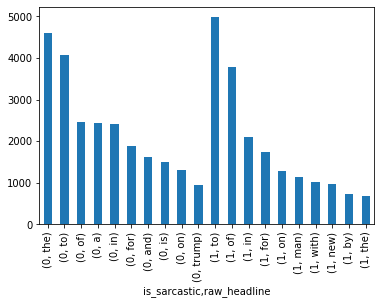

In [363]:
pretty_plot_top_n(counts_raw['raw_headline'])

In [274]:
dom_counts = df.groupby('is_sarcastic')\
    .full_domain.value_counts()\
    .to_frame()
dom_counts.plot.bar()

In [266]:
fake_words = words[words['is_sarcastic'] == 1]
real_words = words[words['is_sarcastic'] == 0]

# Randomly sample 200000 elements
fake_cloud_words = fake_words.headline.sample(n=20000).tolist()
real_cloud_words = real_words.headline.sample(n=20000).tolist()

fake_words = ''
real_words = ''
for word in fake_cloud_words: 
    fake_words = fake_words + word + ' '
for word in real_cloud_words: 
    real_words = real_words + word + ' '
  
  
wordcloud_fake = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(fake_words) 

wordcloud_real = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(real_words) 

In [354]:
words[words['is_sarcastic'] == 0].shape

(98440, 2)

<Figure size 432x288 with 0 Axes>

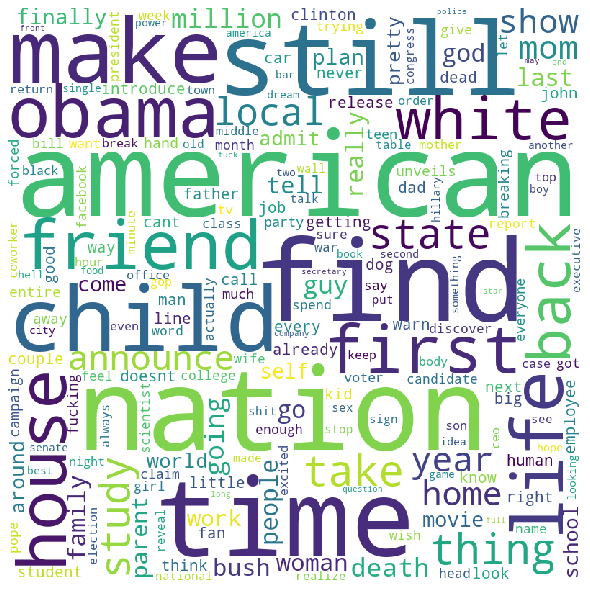

<Figure size 432x288 with 0 Axes>

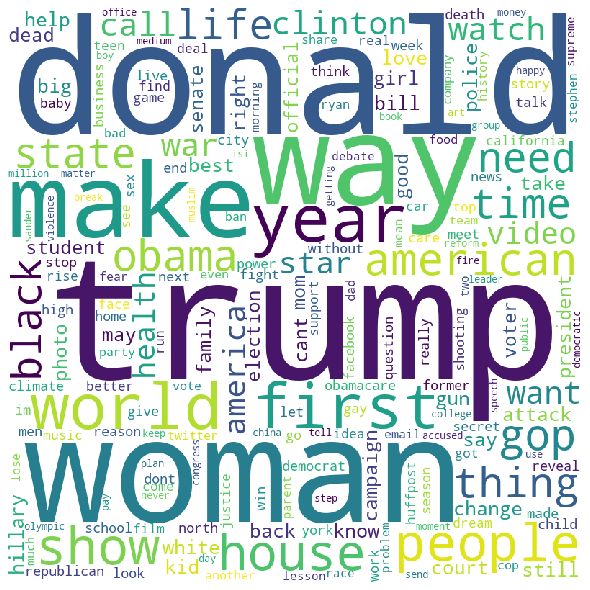

In [267]:
# plot the WordCloud image    

import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

plt.clf()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_real) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [280]:
fake_df = df[df['is_sarcastic'] == 1]
real_df = df[df['is_sarcastic'] == 0]

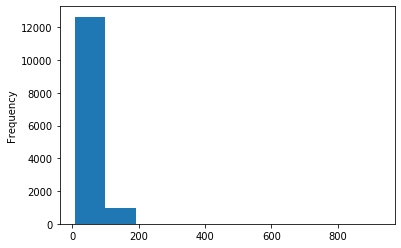

In [291]:
fake_df.word_cnt.plot(kind='hist')


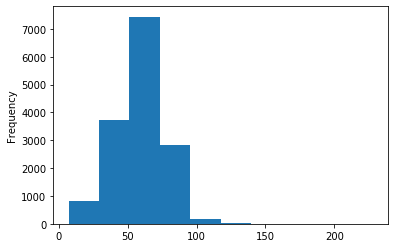

In [292]:
real_df.word_cnt.plot(kind='hist')

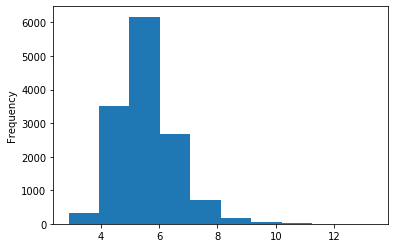

In [365]:
fake_df.avg_word.plot(kind='hist')

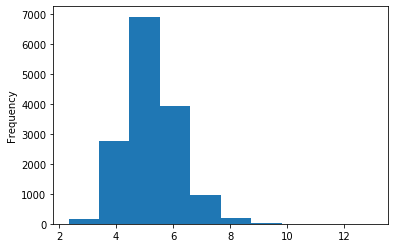

In [366]:
real_df.avg_word.plot(kind='hist')

### Data modelling preperation

In [327]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import decomposition, ensemble

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [299]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['headline'], df['is_sarcastic'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

### NLP feature engineering

In [302]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['headline'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [369]:
xtrain_count.shape

(21464, 25814)

In [303]:
#TF-IDF Vectors as features
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['headline'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['headline'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['headline'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

### Model Build    

In [311]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    '''
    train a model ann return accuaracy
    param: a classifier
    param: training vector
    param: label vector
    param: validation vector
    
    return: accuracy score
    '''
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(predictions, valid_y)

#### Naive Bayes

In [313]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("Naive Bayes, Count Vectors: "+str(accuracy))

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Naive Bayes, WordLevel TF-IDF: "+ str(accuracy))

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("Naive Bayes, N-Gram Vectors: "+ str(accuracy))

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("Naive Bayes, CharLevel Vectors: "+ str(accuracy))

NB, Count Vectors: 0.7920335429769392
NB, WordLevel TF-IDF: 0.7781970649895178
NB, N-Gram Vectors: 0.6257162823200559
NB, CharLevel Vectors: 0.7146051712089448


### Regression models

In [316]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("Regression, Count Vectors: "+str(accuracy))

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Regression, WordLevel TF-IDF: "+str(accuracy))

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("Regression, N-Gram Vectors: "+str(accuracy))

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("Regression, CharLevel Vectors: "+str(accuracy))

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, Count Vectors: 0.7896575821104123
LR, WordLevel TF-IDF: 0.7784765897973445
LR, N-Gram Vectors: 0.6238993710691824
LR, CharLevel Vectors: 0.7433962264150943


### SVM

In [318]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: "+str(accuracy))

# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, WordLevel TF-IDF: "+str(accuracy))

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: "+str(accuracy))

# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: "+str(accuracy))

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LR, Count Vectors: 0.5213137665967854


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LR, WordLevel TF-IDF: 0.5213137665967854


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LR, N-Gram Vectors: 0.5213137665967854


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LR, CharLevel Vectors: 0.5213137665967854


### Random Forest Model

In [319]:
# SVM on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: "+str(accuracy))

# SVM on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: "+str(accuracy))

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: "+str(accuracy))

# SVM on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("RF, CharLevel Vectors: "+str(accuracy))

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors: 0.7231306778476589


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, WordLevel TF-IDF: 0.7361285814116003


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, N-Gram Vectors: 0.6178895877009084


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, CharLevel Vectors: 0.6437456324248777


In [321]:
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
classifier = naive_bayes.MultinomialNB().fit(xtrain_count, train_y)
# predict the labels on validation dataset
predictions = classifier.predict(xvalid_count)

0.7920335429769392

In [323]:
metrics.accuracy_score(predictions, valid_y)

0.7920791355679612

In [325]:
confusion_matrix(valid_y, predictions)

array([[3044,  686],
       [ 802, 2623]], dtype=int64)

In [378]:
metrics.precision_score(predictions, valid_y)

0.7658394160583941

In [379]:
metrics.recall_score(predictions, valid_y)

0.7926866122695678

In [345]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(xvalid_count)


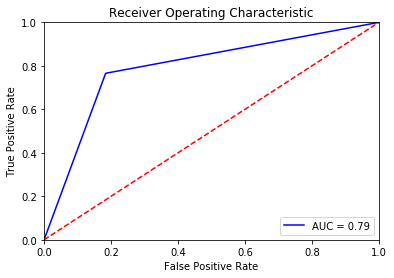

In [348]:
import matplotlib.pyplot as plt
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(valid_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [382]:
import pickle
#save the model
# save the model to disk
pickle.dump(classifier, open('model.sav', 'wb'))